In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')



In [60]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [61]:
#Store the data into a dataframe
df = pd.read_csv('NFLX.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-01,1.156429,1.242857,1.071429,1.076429,1.076429,147880600
1,2002-06-01,1.080000,1.232143,0.842143,0.999286,0.999286,74190200
2,2002-07-01,1.000000,1.299286,0.850000,0.953571,0.953571,73610600
3,2002-08-01,0.950000,0.999286,0.706429,0.936429,0.936429,64883000
4,2002-09-01,0.936429,0.976429,0.689286,0.692857,0.692857,55749400


In [62]:
#Get the number of trading days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       218 non-null    object 
 1   Open       218 non-null    float64
 2   High       218 non-null    float64
 3   Low        218 non-null    float64
 4   Close      218 non-null    float64
 5   Adj Close  218 non-null    float64
 6   Volume     218 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.0+ KB


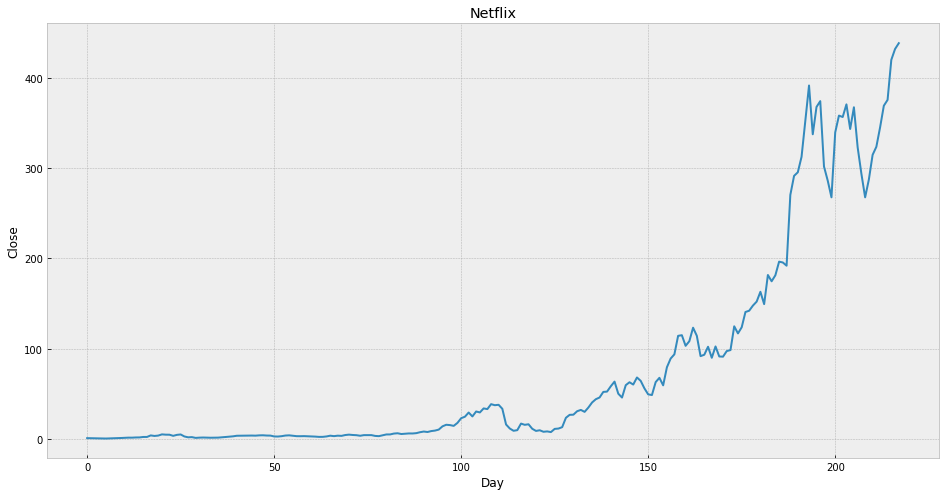

In [63]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Day')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.show()

In [64]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,1.076429
1,0.999286
2,0.953571
3,0.936429


In [65]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
214,375.500000,NaN
215,419.850006,NaN
216,431.820007,NaN
217,438.269989,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       218 non-null    float64
 1   Prediction  193 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [67]:
#Create the feature dataset (X) and convert to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1)) [:-future_days]
print(X)

[[  1.076429]
 [  0.999286]
 [  0.953571]
 [  0.936429]
 [  0.692857]
 [  0.640714]
 [  0.775   ]
 [  0.786429]
 [  0.942857]
 [  1.222143]
 [  1.453571]
 [  1.628571]
 [  1.607143]
 [  1.825   ]
 [  1.871429]
 [  2.380714]
 [  2.397143]
 [  4.092857]
 [  3.5     ]
 [  3.906429]
 [  5.243571]
 [  4.914286]
 [  4.874286]
 [  3.622857]
 [  4.702857]
 [  5.142857]
 [  2.928571]
 [  1.992857]
 [  2.202857]
 [  1.352857]
 [  1.625714]
 [  1.761429]
 [  1.642857]
 [  1.528571]
 [  1.55    ]
 [  1.65    ]
 [  2.041429]
 [  2.344286]
 [  2.651428]
 [  3.08    ]
 [  3.712857]
 [  3.772857]
 [  3.934286]
 [  3.865714]
 [  3.935714]
 [  3.83    ]
 [  4.141428]
 [  4.234286]
 [  3.955714]
 [  3.887143]
 [  2.955714]
 [  2.86    ]
 [  3.254286]
 [  3.951429]
 [  4.182857]
 [  3.694286]
 [  3.258571]
 [  3.218571]
 [  3.312857]
 [  3.167143]
 [  3.128572]
 [  2.77    ]
 [  2.461429]
 [  2.502857]
 [  2.964286]
 [  3.781429]
 [  3.3     ]
 [  3.802857]
 [  3.592857]
 [  4.511428]
 [  4.95    ]
 [  4.

In [68]:
#Create the feature dataset (X) and convert to a numpy array and remove the last 'x' rows/days
y = np.array(df['Prediction']) [:-future_days]
print(y)

[  5.142857   2.928571   1.992857   2.202857   1.352857   1.625714
   1.761429   1.642857   1.528571   1.55       1.65       2.041429
   2.344286   2.651428   3.08       3.712857   3.772857   3.934286
   3.865714   3.935714   3.83       4.141428   4.234286   3.955714
   3.887143   2.955714   2.86       3.254286   3.951429   4.182857
   3.694286   3.258571   3.218571   3.312857   3.167143   3.128572
   2.77       2.461429   2.502857   2.964286   3.781429   3.3
   3.802857   3.592857   4.511428   4.95       4.568572   4.337143
   3.724286   4.412857   4.405715   4.411428   3.537143   3.282857
   4.27       5.162857   5.177143   6.131429   6.472857   5.631429
   5.905715   6.277143   6.232857   6.595714   7.635714   8.375714
   7.87       8.892858   9.435715  10.534286  14.128572  15.878572
  15.521428  14.65      17.931429  23.165714  24.795713  29.414286
  25.1       30.582857  29.524286  33.968571  33.238571  38.685715
  37.527142  37.998573  33.572857  16.181429  11.725715   9.218572


In [0]:
#Split the data into 85% training and 15% testing
x_train , x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)


In [0]:
#Create the models
#Create the desicion tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [71]:
#Get the las 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[102.57    ],
       [ 91.480003],
       [ 91.25    ],
       [ 97.449997],
       [ 98.550003],
       [124.870003],
       [117.      ],
       [123.800003],
       [140.710007],
       [142.130005],
       [147.809998],
       [152.199997],
       [163.070007],
       [149.410004],
       [181.660004],
       [174.710007],
       [181.350006],
       [196.429993],
       [195.509995],
       [191.960007],
       [270.299988],
       [291.380005],
       [295.350006],
       [312.459991],
       [351.600006]])

In [72]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[391.429993 337.450012 367.679993 374.130005 301.779999 267.660004
 267.660004 267.660004 358.100006 356.559998 322.98999  343.279999
 367.320007 322.98999  293.75     267.619995 293.75     314.660004
 323.570007 345.089996 369.029999 375.5      419.850006 431.820007
 438.269989]

[187.4900267  169.02105251 168.63801187 178.96331535 180.79523491
 224.62783475 211.52134949 222.84588636 251.00733919 253.37216458
 262.83146778 270.14245066 288.24506459 265.49607351 319.20433129
 307.62999856 318.6880692  343.80186235 342.26972313 336.35767133
 466.82290837 501.92898549 508.54051532 537.03501098 602.21770913]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


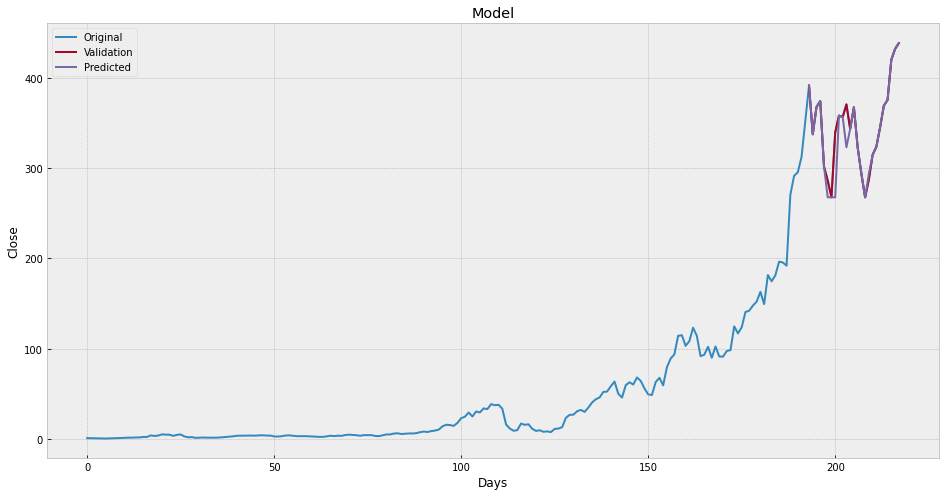

In [73]:
#Visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid ['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Validation', 'Predicted'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


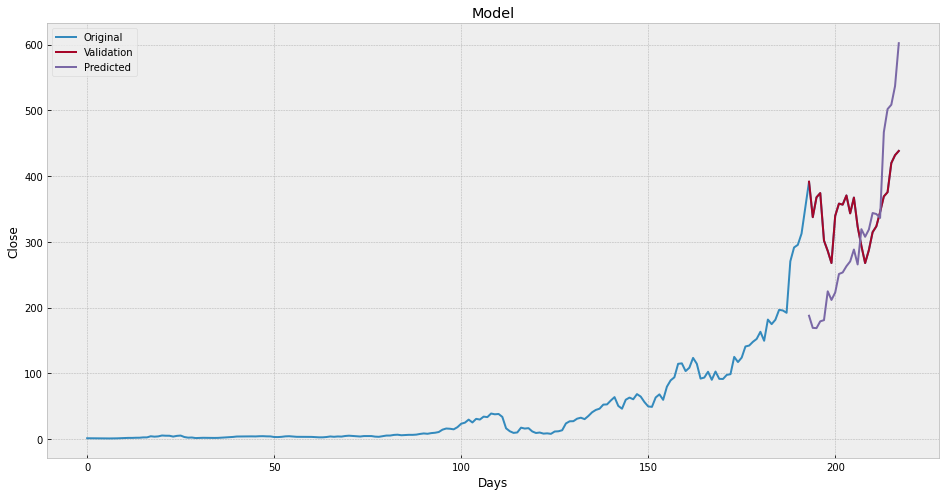

In [74]:
#Visualize the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid ['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Validation', 'Predicted'])
plt.show()